# Modelo regresión lineal


## Modelo con datos simulados

$y = \alpha + \beta x$ 

$x$: 100  valores  distribuidos $N(1.5, 2.5)$

$y_e = 2 + 0.3x  + \varepsilon$

$\varepsilon = N(0, 0.8)$

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [54]:
x = 1.5 + 2.5 * np.random.randn(100)
e = .08 * np.random.randn(100) #el error epsilon
y_e = 2.0 + 0.3 * x + e #El valor que realmente es
y_pre = 2.0 + 0.3 * x #El valor que se espera tener

In [55]:
df = pd.DataFrame({'x': x, 'y actual': y_e, 'y predecida': y_pre})
df

,x,y actual,y predecida
0,1.430033,2.435514,2.429010
1,-1.834509,1.278025,1.449647
2,1.260265,2.333075,2.378080
3,3.612486,3.031887,3.083746
4,4.148569,3.130177,3.244571
...,...,...,...
95,-0.989578,1.779586,1.703127
96,4.217742,3.187058,3.265323
97,2.270537,2.625392,2.681161
98,4.131222,3.180350,3.239367


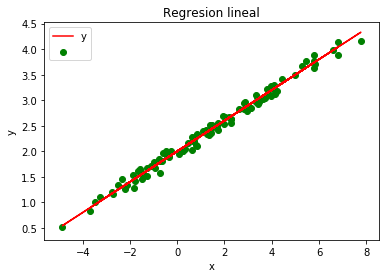

In [56]:
plt.plot(df['x'], df['y predecida'], 'r')
plt.scatter(df['x'], df['y actual'], color ='green')
plt.legend('y predecida')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion lineal');

In [57]:
SSD = np.sum((df['y actual'] - df['y predecida']) ** 2)
SSR = np.sum((np.mean(df['y actual']) - df['y predecida'])**2)
SST = SSR + SSD
R_2 = SSR/SST
print(f"El valor de R^2 es {R_2}")

El valor de R^2 es 0.9887323313465272


# Obteniendo la recta de regresión

$\beta = \frac {\sigma(x, y)}{\sigma(x)}$

$\alpha = \mu_{y} - \beta \mu_{x}$

$y = \alpha + \beta x$

In [74]:
beta_ma = np.cov(df['x'], df['y actual'])/np.var(df['x'])
beta = beta_ma[0, 1]
print(f"Beta = {beta} ")

Beta = 0.2999230406849555 


In [75]:
alpha = np.mean(df['y actual']) - beta * np.mean(df['x'])
print(f"alpha = {alpha}")

alpha = 1.9998069084771875


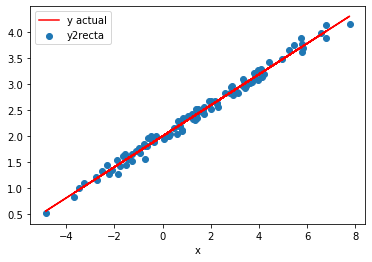

In [80]:
plt.scatter(df['x'], df['y actual'])
df['y2recta'] = alpha+beta*df['x']
plt.plot(df['x'], df['y2recta'], 'r')
plt.xlabel('x')
plt.legend(['y actual', 'y2recta']);

El valor de la recta que prediimos es:

$y = 1.9998069084771875 + 0.2999230406849555*x$

In [81]:
SSD = np.sum((df['y actual'] - df['y2recta']) ** 2)
SSR = np.sum((np.mean(df['y actual']) - df['y2recta'])**2)
SST = SSR + SSD
R_2 = SSR/SST
print(f"El valor de R^2  es {R_2}")

El valor de R^2  es 0.9885803357384902


## Error estándar del residuo

In [83]:
RSE = np.sqrt(SSD/(df.shape[0] - 2))
print(f"El RSE es {RSE}")

El RSE es 0.08623195466989471


In [93]:
df.iloc[0:9, 0]

0    1.430033
1   -1.834509
2    1.260265
3    3.612486
4    4.148569
5    1.466978
6   -0.637162
7   -1.645958
8    3.083410
Name: x, dtype: float64

In [85]:
df.y2recta

0     2.424418
1     1.455098
2     2.374010
3     3.072440
4     3.231616
        ...   
95    1.705978
96    3.252155
97    2.673983
98    3.226465
99    1.369504
Name: y2recta, Length: 100, dtype: float64

In [149]:
pd.isnull(df.y2recta).sum()
df.y2recta.isnull().sum()

0

In [97]:
a = "Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity"
'tropical' in a

True

In [119]:
df['y2recta'].value_counts()

2.055682    1
2.137185    1
1.787028    1
2.573030    1
2.424418    1
           ..
1.472072    1
3.563000    1
2.498455    1
2.092827    1
1.621095    1
Name: y2recta, Length: 100, dtype: int64

In [123]:
a = df.groupby('y2recta')

In [132]:
for name, group in a:
    print('name: ', name)
    print(group, '\n')

name:  0.5561987109728861
           x  y actual  y predecida   y2recta
22 -4.861881  0.516004     0.541436  0.556199 

name:  0.9071794455511588
           x  y actual  y predecida   y2recta
43 -3.679824  0.821686     0.896053  0.907179 

name:  0.9628053244037311
           x  y actual  y predecida   y2recta
68 -3.492484  1.001924     0.952255  0.962805 

name:  1.0248239161042951
           x  y actual  y predecida   y2recta
28 -3.283613  1.100179     1.014916  1.024824 

name:  1.1808723344902181
           x  y actual  y predecida   y2recta
92 -2.758063  1.209842     1.172581  1.180872 

name:  1.1894568334563158
          x  y actual  y predecida   y2recta
9 -2.729152  1.155236     1.181255  1.189457 

name:  1.2547912009996347
           x  y actual  y predecida   y2recta
59 -2.509114  1.337297     1.247266  1.254791 

name:  1.3092258155035164
           x  y actual  y predecida   y2recta
60 -2.325786  1.448108     1.302264  1.309226 

name:  1.34102940741057
           x  y ac

array([2.42441781, 1.45509763, 2.3740097 , 3.07243998, 3.2316159 ,
       2.43538767, 1.81061836, 1.51108268, 2.91534476, 1.18945683,
       2.09282745, 3.12327967, 3.71897873, 1.66734169, 2.23176684,
       3.47620893, 2.21213047, 1.47207174, 1.77393856, 3.73417106,
       2.84220419, 1.56687552, 0.55619871, 2.20414563, 3.9539222 ,
       4.01403979, 3.1830995 , 2.18557962, 1.02482392, 2.65264581,
       4.01942406, 2.51206813, 2.24215066, 3.5630001 , 3.13796011,
       3.00345534, 2.40833007, 3.01589695, 3.03107765, 2.51481223,
       2.5730299 , 1.92186052, 1.85835039, 0.90717945, 2.23907856,
       2.77124571, 3.21344228, 2.99468655, 2.05568249, 2.4984547 ,
       1.55262853, 1.34102941, 2.18348368, 3.6184241 , 2.40236399,
       1.62107545, 2.36090599, 3.17744839, 2.50009513, 1.2547912 ,
       1.30922582, 2.07437226, 1.62109467, 2.13718477, 2.85730125,
       1.71637585, 1.86819625, 2.42056765, 0.96280532, 1.89793181,
       2.25382273, 1.44166083, 2.92684028, 2.67946155, 2.42829

In [136]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([1, 2, 3])

In [142]:
b[:, np.newaxis] + a

array([[ 2,  3,  4],
       [ 6,  7,  8],
       [10, 11, 12]])

In [155]:
a = [1, 2, 3, 4, 4]
min(a)

1

TypeError: 'builtin_function_or_method' object is not subscriptable

In [152]:
b.pop()

AttributeError: 'numpy.ndarray' object has no attribute 'pop'